* [Gaussian Distribution](#gaussian_dist)
* [Z Distribution](#z_dist)
* [Uniform Distribution](#uniform_dist)
* [Random Distribution](#uniform_dist)
* [Poisson Distribution](#uniform_dist)

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

## Gaussian Distribution <a class="anchor" id="gaussian_dist"></a>

1) distribution plot of thevfeature will be bell shaped <br>
2) When mean, median and mode, all are same of given dataset, then such data distribution is called Normal Distrubtion.  <br>
3) he center value of curve is mean value, and 50% of values are less than the mean and 50% greater than the mean. And it is denoted as X ~ N(μ,σ2). <br>
$
\begin{align}
& P(x_{i}\mid y_{k}) = \frac{1}{\sigma_{y_{k}}\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{x_{i}-\mu_{y_{k}}}{\sigma_{y_{k}}}\right)^{\!2}\,\right)
\end{align}
$

In [70]:
def get_conf():
    try:
        conf = {
            "data_fl_path": "../DataSets/CompanyABCProfit.csv"
        }       
        return conf
    except Exception as e:
        raise e

In [71]:
def load_data(conf):
    try:
        df = pd.read_csv(conf["data_fl_path"])
        df.rename(columns = {"Profit(Rs '000)":"profit"}, inplace=True)
        return df
    except Exception as e:
        raise

In [72]:
def plot_dist(df):
    try:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
        sns.kdeplot(df['profit'], fill=True, color="b", ax=axs[0])
        axs[0].set_title('KDE PLOT')
        sns.histplot(df["profit"], kde=True, ax=axs[1])
        axs[1].set_title('HISTOGRAM PLOT')
    except Exception as e:
        raise e

In [73]:
def plot_QQ(df):
    try:
        fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
        qqplot(df['profit'], line='s', ax=axs)
        axs.set_title('Q-Q PLOT')
    except Exception as e:
        raise e

In [74]:
'''
Shapiro-Wilk Test
'''
def shapiro_test(df):
    try:
        stat, p = shapiro(df['profit'])
        if p > 0.05:
            s = 'It is normally distributed.'
            display(f"Stats: {stat},  P value: {p}, {s}")
        else:
            s = 'It is not normally distributed'
            display(f"Stats: {stat},  P value: {p}, {s}")
    except Exception as e:
        raise e

In [75]:
'''
D’Agostino’s K2 Test
'''
def agostino_test(df):
    try:
        stat, p = normaltest(df['profit'])
        if p > 0.05:
            s = 'It is normally distributed.'
            display(f"Stats: {stat},  P value: {p}, {s}")
        else:
            s = 'It is not normally distributed'
            display(f"Stats: {stat},  P value: {p}, {s}")
    except Exception as e:
        raise e

In [80]:
'''
Anderson-Darling Test
'''
def anderson_test(df):
    try:
        result = anderson(df['profit'])
        print('stat=%.3f' % (result.statistic))

        for i in range(len(result.critical_values)):
            sl, cv = result.significance_level[i], result.critical_values[i]
            if result.statistic < cv:
                print('Probably Gaussian at the %.1f%% level' % (sl))
            else:
                print('Probably not Gaussian at the %.1f%% level' % (sl))
    except Exception as e:
        raise e

,Year,profit
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764


'Stats: 0.990578830242157,  P value: 0.21675562858581543, It is normally distributed.'

'Stats: 0.579653805070008,  P value: 0.7483931013159193, It is normally distributed.'

stat=0.459
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


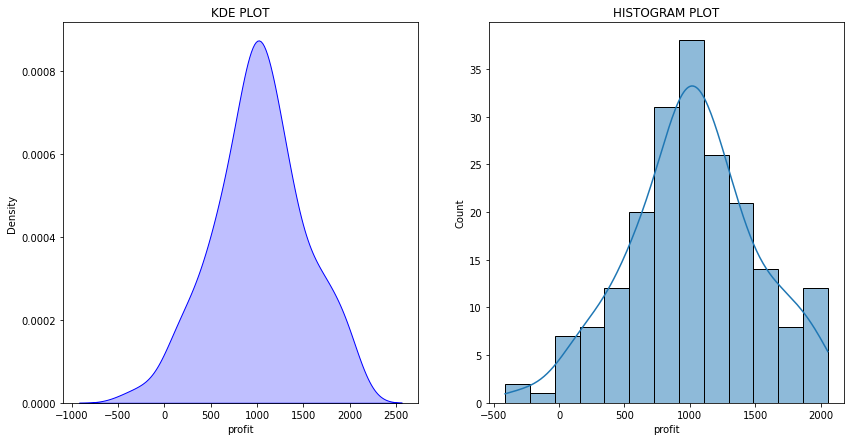

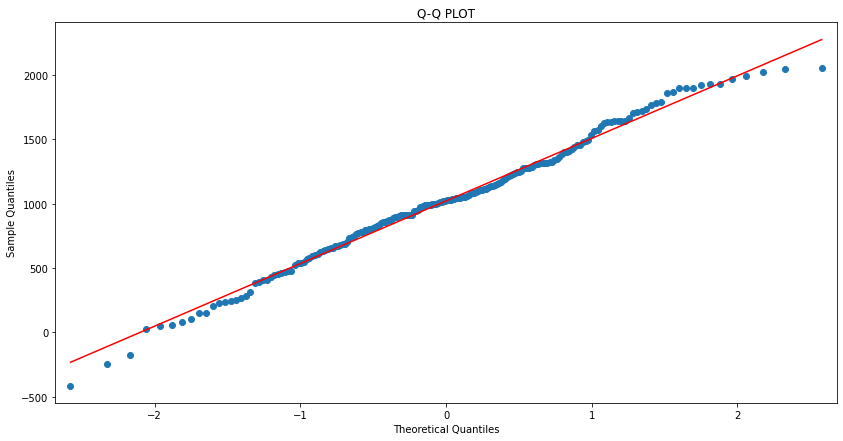

In [81]:
def gaussian_chk():
    try:
        conf = get_conf()
        df = load_data(conf)
        display(df.head())
        plot_dist(df)
        plot_QQ(df)
        shapiro_test(df)
        agostino_test(df)
        anderson_test(df)
    except Exception as e:
        raise e

gaussian_chk()

## Resources
1) https://www.kaggle.com/datasets/tinasoni/normal-distribution-data
2) https://www.kaggle.com/code/ysthehurricane/methods-of-normality-tests-in-statistics
3) https://www.kaggle.com/code/snehsingh001/methods-of-normality-tests-in-statistics
4) https://www.kaggle.com/code/tinasoni/learn-statistics-story-of-population-data
5) https://www.kaggle.com/tinasoni